In [91]:
import pandas as pd

In [ ]:
df_model = pd.read_csv("../data/cleaned_tweets.csv")

In [ ]:
df_model = df_model.loc[df_model['Datetime'] >= '2022-06-01']

In [ ]:
df_model = df_model.loc[df_model['Datetime'] <= '2022-06-31']

In [ ]:
df_model

In [ ]:
df_model.to_csv("../data/data_original_06.csv",index=False)

In [ ]:
import pandas as pd
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
desc = df_model.tokens_text.values
vectorizer = TfidfVectorizer(stop_words = stop_words,max_features = 1000)
X = vectorizer.fit_transform(desc)
words = vectorizer.get_feature_names()

In [ ]:
df_model = pd.DataFrame(X.toarray(),columns=words)

In [ ]:
df_model

In [ ]:
#PCA
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
pca = PCA(n_components=3)
pca_fit = pca.fit_transform(df_model)
df_pca = pd.DataFrame(data=pca_fit, columns=['PC1','PC2','PC3'])
#df_pca.head()
#fig, ax = plt.subplots(2, 2, figsize=(15,8))
#sns.scatterplot(data=df_pca, x='PC1', y='PC2',ax=ax[0][0])
#sns.scatterplot(data=df_pca, x='PC1', y='PC3',ax=ax[0][1])
#sns.scatterplot(data=df_pca, x='PC2', y='PC3',ax=ax[1][0])
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())
#fig.delaxes(ax[1][1])

In [21]:
# Loadings matrix

loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_model.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3
variable,,,
aaa,-0.001037,-0.001531,-0.001054
ability,-0.000902,-0.001695,-0.001204
able,-0.001166,-0.002828,-0.002272
absolutely,-0.001492,-0.002614,-0.001098
access,-0.001769,-0.002903,-0.003738
...,...,...,...
zhao,-0.001133,-0.001447,-0.000874
zhi,-0.000646,-0.000821,-0.000493
zhu,-0.000608,-0.000756,-0.000451


In [22]:
# Varimax rotation
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors=3, method='principal', rotation="varimax")
fa_fit = fa.fit_transform(df_model)
loadings = fa.loadings_
fa.get_factor_variance()[2]

array([0.00580818, 0.01088558, 0.01593078])

In [20]:
# Varimax loadings matrix
pd.DataFrame.from_records(loadings)

,0,1,2
0,-0.199071,-0.701390,0.665493
1,-0.009222,-0.025661,-0.021952
2,-0.004106,-0.002853,-0.019866
3,-0.001275,0.000308,-0.017697
4,-0.199071,-0.701390,0.665493
...,...,...,...
966,-0.004328,-0.025481,-0.006142
967,0.001719,-0.003605,-0.018564
968,0.008166,-0.004922,-0.012599
969,0.008107,-0.001614,-0.009369


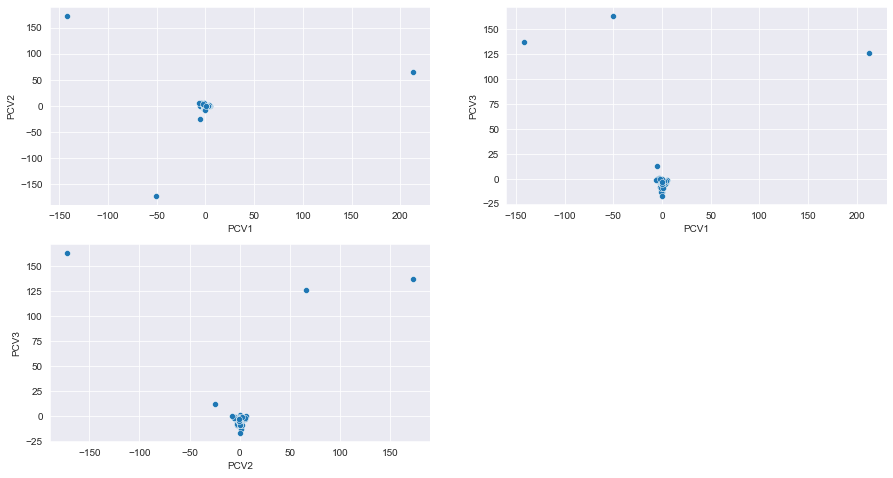

In [21]:
# New Principal Components after varimax 
df_fa = pd.DataFrame(data=fa_fit, columns=['PCV1', 'PCV2','PCV3'])
df_fa.head()
fig, ax = plt.subplots(2, 2, figsize=(15,8))
sns.scatterplot(data=df_fa, x='PCV1', y='PCV2',ax=ax[0][0])
sns.scatterplot(data=df_fa, x='PCV1', y='PCV3',ax=ax[0][1])
sns.scatterplot(data=df_fa, x='PCV2', y='PCV3',ax=ax[1][0])
fig.delaxes(ax[1][1])

In [ ]:
from pyclustertend import hopkins
1-hopkins(df_model, df_model.shape[0])

In [99]:
df_model.to_csv("../data/data_to_cluster06.csv",header=words,index=False)